In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.animation as animation
import matplotlib.ticker as ticker
import matplotlib

<IPython.core.display.Javascript object>


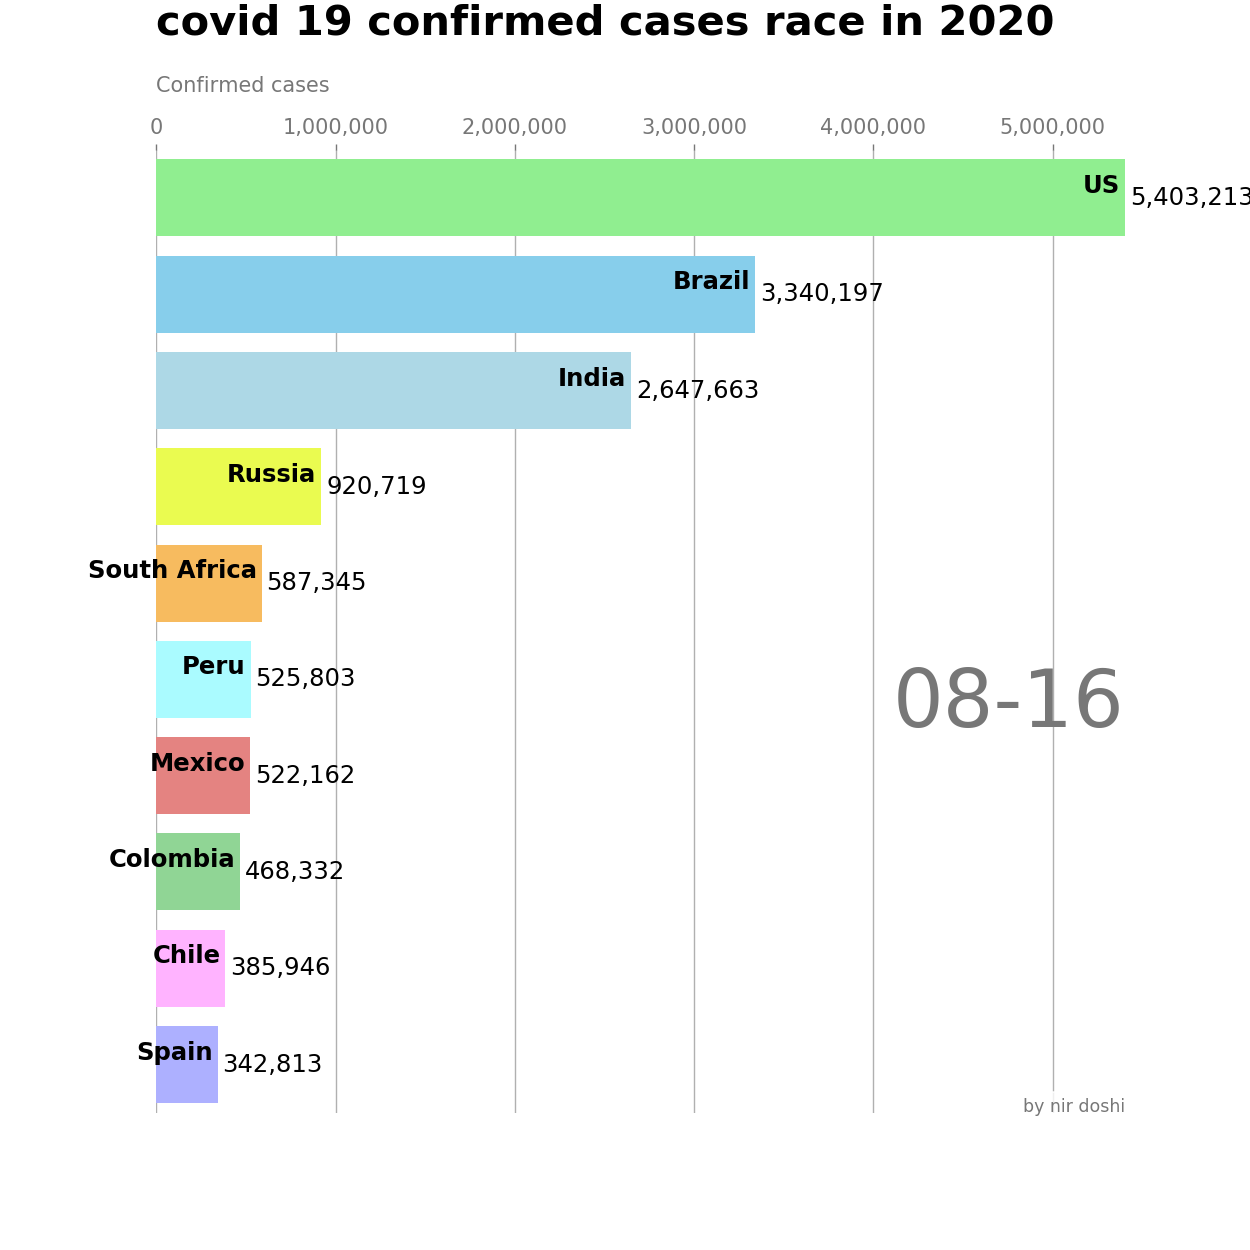

In [8]:
%matplotlib notebook
df=pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv')
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Country')
top_10=df.groupby('Country')['Confirmed'].last()
top_10=top_10.nlargest(10);

#Country
#US              5361165
#Brazil          3317096
#India           2589952
#Russia           915808
#South Africa     583653
#Mexico           517714
#Peru             516296
#Colombia         456689
#Chile            383902
#Spain            342813
#Name: Confirmed, dtype: int64

df['month-day']=df['Date'].dt.strftime('%m-%d')
df['month']=df['Date'].dt.strftime('%m');
df=df.reset_index()
df=df[(df['Country']=='US') | (df['Country']=='Brazil') | (df['Country']=='India')
                     | (df['Country']=='Russia')| (df['Country']=='South Africa')| (df['Country']=='Mexico')
                     | (df['Country']=='Peru')| (df['Country']=='Colombia')| (df['Country']=='Chile')
                     | (df['Country']=='Spain')]
df=df.set_index(df['month-day'])
fig, ax = plt.subplots(figsize=(10,10))
colors=['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50','lightblue','skyblue','lightgreen']
temp=df['month-day'].unique()
def draw_barchart(year):
    data=temp[year]
    dff = df[df['month-day'].eq(data)].sort_values(by='Confirmed', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Country'], dff['Confirmed'],color=colors)
    dx = dff['Confirmed'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Confirmed'], dff['Country'])):
        ax.text(value-dx, i,name, size=14, weight=800, ha='right', va='bottom')
        #ax.text(value-dx, i-.25, group_lk[name], size=8, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,f'{value:,.0f}',size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, data, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=500)
    ax.text(0, 1.06, 'Confirmed cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
    ax.text(0, 1.12, 'covid 19 confirmed cases race in 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by nir doshi', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
#draw_barchart(100)
ani=matplotlib.animation.FuncAnimation(fig,draw_barchart,frames=len(temp),interval=100,repeat=False,save_count=100)